# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Szymon Grudzień

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [80]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [81]:
# ===== Twoja implementacja tutaj =====
m = 50
n = 12
A, b = main.spare_matrix_Abt(m, n)

# Metoda pierwsza - przekształcenie A = A^T * A oraz b = A^T * b + funkcja np.linalg.solve()
def normal_method():
    A1, b1 = main.square_from_rectan(A, b)
    return np.linalg.solve(A1, b1)

print("Metoda 1: Równania normalne")
%timeit -o x1 = normal_method()
%memit x1 = normal_method()
x1 = normal_method()
res1 = main.residual_norm(A, x1, b)
print(f"Norma residuum: {res1}\n")


# Metoda druga - funkcja np.linalg.lstsq()
def lstsq_method():
    return (np.linalg.lstsq(A, b))[0]

print("Metoda 2: lstsq")
%timeit -o x2 = lstsq_method()
%memit x2 = lstsq_method()
x2 = lstsq_method()
res2 = main.residual_norm(A, x2, b)
print(f"Norma residuum: {res2}\n")


# Metoda trzecia - rozkład QR + funkcja np.linalg.qr() i sp.linalg.solve_triangular()
def qr_method():
    Q, R = np.linalg.qr(A, mode='reduced')
    b3 = Q.T @ b
    return sp.linalg.solve_triangular(R, b3)

print("Metoda 3: QR")
%timeit -o x3 = qr_method()
%memit x3 = qr_method()
x3 = qr_method()
res3 = main.residual_norm(A, x3, b)
print(f"Norma residuum: {res3}\n")


# Metoda czwarta - rozkład SVD + funkcja np.linalg.svd()
def svd_method():
    U, S, V = np.linalg.svd(A, full_matrices=False)
    return V.T @ ((U.T @ b) / S)

print("Metoda 4: SVD")
%timeit -o x4 = svd_method()
%memit x4 = svd_method()
x4 = svd_method()
res4 = main.residual_norm(A, x4, b)
print(f"Norma residuum: {res4}\n")

# Podsumowanie
print("Podsumowanie wyników")
print("Metoda\t| ||Ax - b||")
print("-" * 26)
print(f"Normal\t| {res1}")
print(f"Lstsq\t| {res2}")
print(f"QR\t| {res3}")
print(f"SVD\t| {res4}")


Metoda 1: Równania normalne
15.8 μs ± 5.78 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 196.78 MiB, increment: 0.01 MiB
Norma residuum: 1.3204737207184956e-07

Metoda 2: lstsq
24.2 μs ± 218 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 196.78 MiB, increment: 0.00 MiB
Norma residuum: 7.999154129059378e-09

Metoda 3: QR
41.5 μs ± 163 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 196.78 MiB, increment: 0.00 MiB
Norma residuum: 7.999155062803204e-09

Metoda 4: SVD
29.4 μs ± 91.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 196.78 MiB, increment: 0.00 MiB
Norma residuum: 7.999155472630631e-09

Podsumowanie wyników
Metoda	| ||Ax - b||
--------------------------
Normal	| 1.3204737207184956e-07
Lstsq	| 7.999154129059378e-09
QR	| 7.999155062803204e-09
SVD	| 7.999155472630631e-09


Wnioski:

Metoda równań normalnych jest najszybsza, ale mniej dokładna (większe residuum).
Metody lstsq, QR i SVD są bardziej stabilne numerycznie, z niemal identyczną dokładnością.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [82]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Równanie regresji:  w = 0.7861 * d + (-3.5036)

Dla dochodu 210: prognozowany wydatek = 161.5771083199547 	błąd = -21.577108319954704
Dla dochodu 270: prognozowany wydatek = 208.74303522523377 	błąd = -18.74303522523377
Dla dochodu 290: prognozowany wydatek = 224.46501086032677 	błąd = 25.53498913967323
Dla dochodu 310: prognozowany wydatek = 240.1869864954198 	błąd = 29.813013504580198
Dla dochodu 370: prognozowany wydatek = 287.35291340069887 	błąd = 2.647086599301133
Dla dochodu 400: prognozowany wydatek = 310.9358768533384 	błąd = -0.9358768533384136
Dla dochodu 450: prognozowany wydatek = 350.24081594107093 	błąd = -10.240815941070935
Dla dochodu 480: prognozowany wydatek = 373.8237793937105 	błąd = -13.823779393710481
Dla dochodu 510: prognozowany wydatek = 397.40674284635 	błąd = 22.593257153649972
Dla dochodu 520: prognozowany wydatek = 405.26773066389654 	błąd = -15.267730663896543

Norma błędu (||w - w_pred||): 58.353555219393854


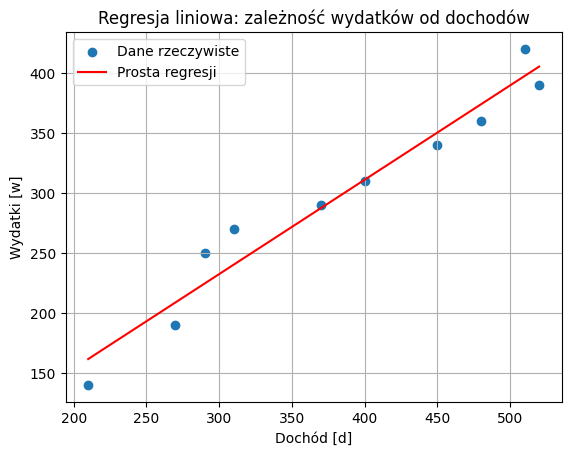

In [83]:
# dane
w_avg = np.mean(w)
d_avg = np.mean(d)

# wpolczynniki (y = ax + b)
a = np.sum((d - d_avg) * (w - w_avg)) / np.sum((d - d_avg) ** 2)
b = w_avg - a * d_avg

# bledy
w_pred = a * d + b
errors = w - w_pred
norm_err = np.linalg.norm(errors)

print(f"Równanie regresji:  w = {a:.4f} * d + ({b:.4f})\n")

for i in range(len(d)):
    print(f"Dla dochodu {d[i]}: prognozowany wydatek = {w_pred[i]} \tbłąd = {errors[i]}")

print(f"\nNorma błędu (||w - w_pred||): {norm_err}")

# wykres
plt.scatter(d, w, label="Dane rzeczywiste")
plt.plot(d, w_pred, color="red", label="Prosta regresji")
plt.xlabel("Dochód [d]")
plt.ylabel("Wydatki [w]")
plt.title("Regresja liniowa: zależność wydatków od dochodów")
plt.legend()
plt.grid(True)
plt.show()

Prosta regresji dobrze odwzorowuje zależność pomiędzy dochodami a wydatkami. Dane są blisko linii dopasowania, co potwierdza niewielka norma błędu. Aby dopasowanie było lepsze, można użyć np. dopasowania wielomianowego (a nie liniowego).

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

y = a + b1 * x1
b1 = [[2.05511356]
 [0.81340736]]


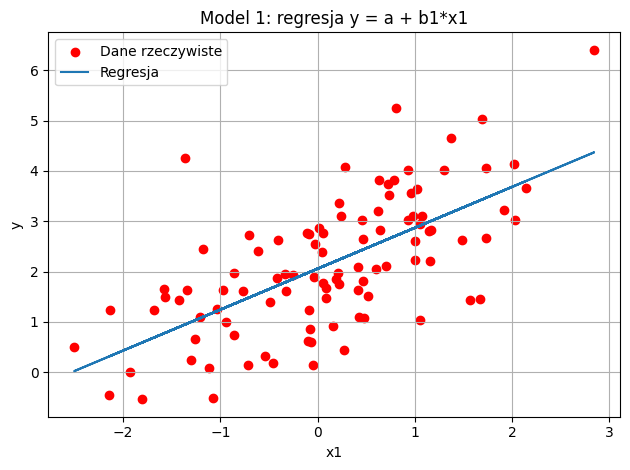

y = a + b2 * x2
b2 = [[ 2.1022591 ]
 [-0.41289205]]


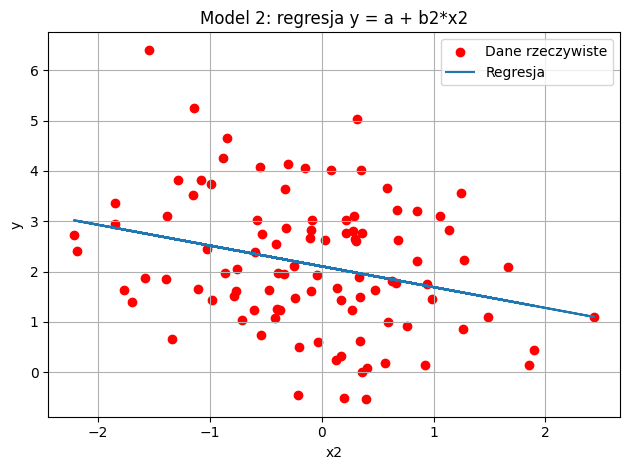

y = a + b1*x1 + b2*x2
b = [[ 2.00082275]
 [ 0.8447055 ]
 [-0.48727435]]


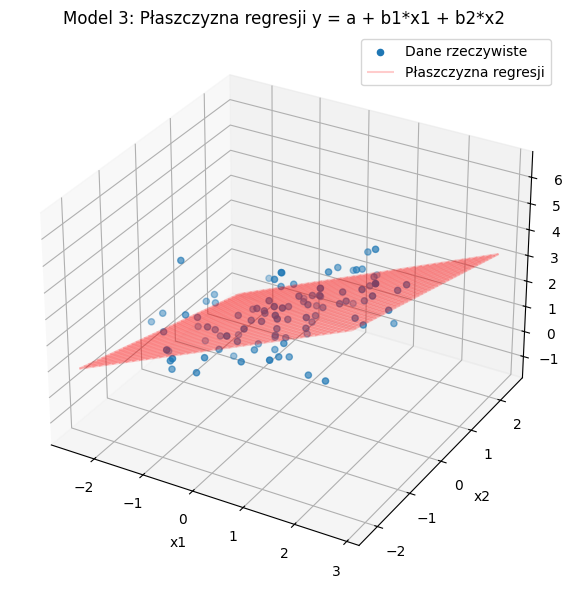

y = a + b1*x1 + b2*x2 + b12*(x1*x2)
b = [[ 1.99886754]
 [ 0.84796057]
 [-0.49013809]
 [ 0.02063877]]


In [89]:
# Punkt 1

x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))
eps = np.random.normal(0, 1, (100, 1))

y = 2 + x1 - 0.5 * x2 + eps

# Punkt 2

def qr(Z, y):
    Q, R = np.linalg.qr(Z)
    return sp.linalg.solve_triangular(R, Q.T @ y)

# Model 1

# Równanie analityczne:
#   y = b0 + b1*x1
# gdzie:
#   b0 – wyraz wolny,
#   b1 – współczynnik przy zmiennej x1.
#
# Postać macierzowa:
#   Z1 = [1, x1],   b = [b0, b1]^T,   y = Z1 @ b
# Wymiary:
#   Z1 – (100, 2),  b – (2, 1),  y – (100, 1)

Z1 = np.concatenate((np.ones((100, 1)), x1), axis=1)
b1 = qr(Z1, y)
y1 = Z1 @ b1

print("y = a + b1 * x1")
print(f"b1 = {b1}")

plt.scatter(x1, y, color="red", label="Dane rzeczywiste")
plt.plot(x1, y1, label="Regresja")
plt.title("Model 1: regresja y = a + b1*x1")
plt.xlabel("x1");
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Model 2

# Równanie analityczne:
#   y = b0 + b2*x2
# gdzie:
#   b0 – wyraz wolny,
#   b2 – współczynnik przy zmiennej x2.
#
# Postać macierzowa:
#   Z2 = [1, x2],   b = [b0, b2]^T,   y = Z2 @ b
# Wymiary:
#   Z2 – (100, 2),  b – (2, 1),  y – (100, 1)

Z2 = np.concatenate((np.ones((100, 1)), x2), axis=1)
b2 = qr(Z2, y)
y2 = Z2 @ b2

print("y = a + b2 * x2")
print(f"b2 = {b2}")

plt.scatter(x2, y, color="red", label="Dane rzeczywiste")
plt.plot(x2, y2, label="Regresja")
plt.title("Model 2: regresja y = a + b2*x2")
plt.xlabel("x2");
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Model 3

# Równanie analityczne:
#   y = b0 + b1*x1 + b2*x2
# gdzie:
#   b0 – wyraz wolny,
#   b1, b2 – współczynniki regresji dla x1 i x2.
#
# Postać macierzowa:
#   Z3 = [1, x1, x2],   b = [b0, b1, b2]^T,   y = Z3 @ b
# Wymiary:
#   Z3 – (100, 3),  b – (3, 1),  y – (100, 1)

Z3 = np.concatenate((np.ones((100, 1)), x1, x2), axis=1)
b3 = qr(Z3, y)
y3 = Z3 @ b3

print("y = a + b1*x1 + b2*x2")
print(f"b = {b3}")

x1_grid = np.linspace(x1.min(), x1.max(), 40)
x2_grid = np.linspace(x2.min(), x2.max(), 40)
X1, X2 = np.meshgrid(x1_grid, x2_grid)

Y_pred = b3[0] + b3[1]*X1 + b3[2]*X2

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, label="Dane rzeczywiste")

ax.plot_wireframe(X1, X2, Y_pred, color='red', alpha=0.2, label="Płaszczyzna regresji")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Model 3: Płaszczyzna regresji y = a + b1*x1 + b2*x2")

plt.legend()
plt.tight_layout()
plt.show()

# Model 4

# Równanie analityczne:
#   y = b0 + b1*x1 + b2*x2 + b12*(x1*x2)
# gdzie:
#   b0 – wyraz wolny,
#   b1, b2 – współczynniki regresji,
#   b12 – współczynnik przy x1 * x2.
#
# Postać macierzowa:
#   Z4 = [1, x1, x2, x1*x2],   b = [b0, b1, b2, b12]^T,   y = Z4 @ b
# Wymiary:
#   Z4 – (100, 4),  b – (4, 1),  y – (100, 1)

Z4 = np.concatenate((np.ones((100, 1)), x1, x2, x1 * x2), axis=1)
b4 = qr(Z4, y)
y4 = Z4 @ b4

print("y = a + b1*x1 + b2*x2 + b12*(x1*x2)")
print(f"b = {b4}")

Wnioski:

Najlepsze dopasowanie uzyskano dla modelu trzeciego, który odpowiada rzeczywistej postaci procesu y = 2 + x_1 - 0.5x_2 + eps.  
Model 4, zawierający dodatkowy składnik x1*x2, nie poprawia dopasowania, ponieważ w prawdziwym równaniu nie ma takiego składnika.  
Modele 1 i 2 uwzględniają tylko pojedyncze zmienne, więc są mniej dokładne.  


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)